
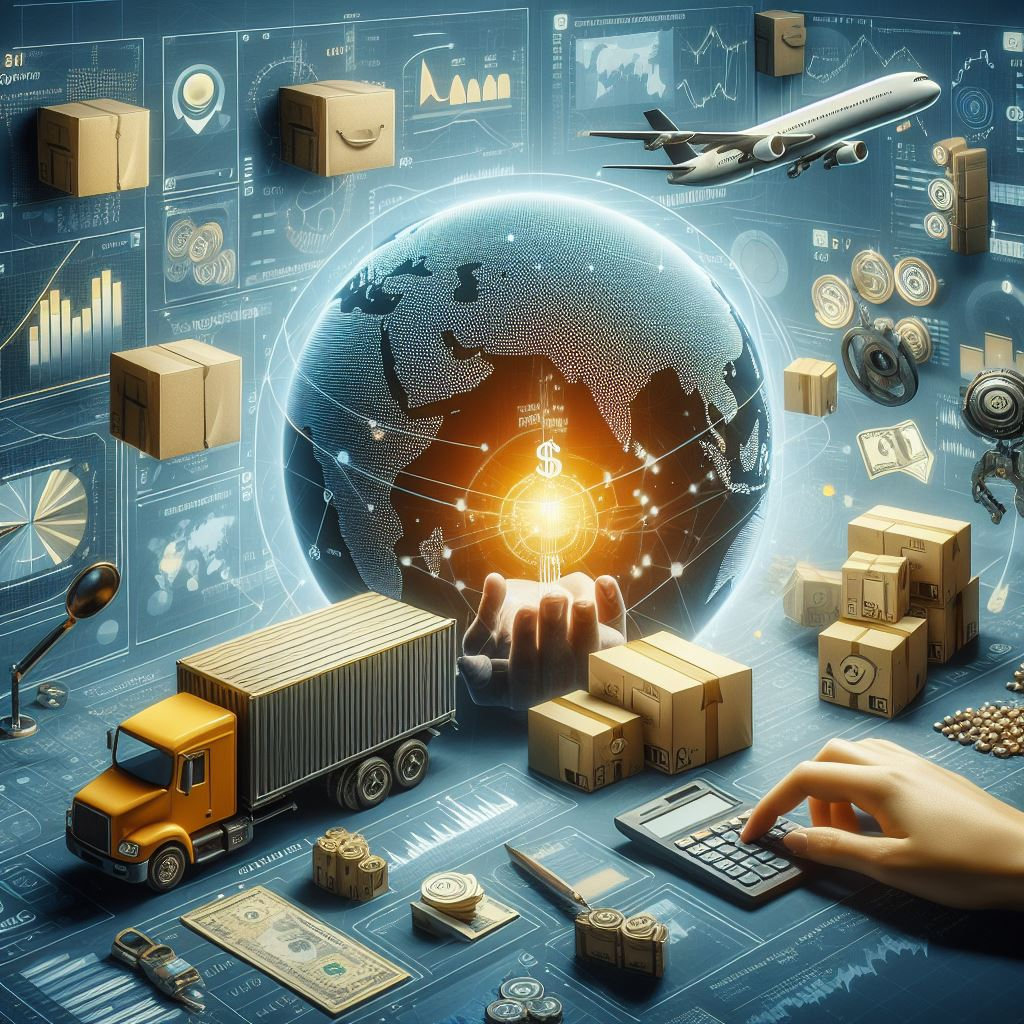





## Problem Statement

The project aims to develop a predictive model to forecast consignment pricing using available dataset variables, enabling logistics stakeholders to optimize supply chain processes and enhance operational efficiency through informed decision-making.

## Attributes


1. **ID:** Unique identifier for each record.

2. **Project Code:** Code representing the project.

3. **PQ #:** Purchase Order (PQ) number.

4. **PO / SO #:** Purchase Order (PO) or Sales Order (SO) number.

5. **ASN/DN #:** Advanced Shipping Notice (ASN) or Delivery Note (DN) number.

6. **Country:** Country where the project is located.

7. **Managed By:** Entity responsible for managing the project.

8. **Fulfill Via:** Method used to fulfill the project.

9. **Vendor INCO Term:** Vendor Inco Term specifying the responsibilities for shipping costs.

10. **Shipment Mode:** Mode of shipment.

11. **PQ First Sent to Client Date:** Date when the PQ was first sent to the client.

12. **PO Sent to Vendor Date:** Date when the PO was sent to the vendor.

13. **Scheduled Delivery Date:** Scheduled delivery date for the project.

14. **Delivered to Client Date:** Date when the project was delivered to the client.

15. **Delivery Recorded Date:** Date when the delivery was recorded.

16. **Product Group:** Group to which the product belongs.

17. **Sub Classification:** Sub-classification of the product.

18. **Vendor:** Vendor providing the product.

19. **Item Description:** Description of the item.

20. **Molecule/Test Type:** Molecule or test type of the item.

21. **Brand:** Brand of the product.

22. **Dosage:** Dosage of the product.

23. **Dosage Form:** Form in which the dosage is administered.

24. **Unit of Measure (Per Pack):** Unit of measure per pack.

25. **Line Item Quantity:** Quantity of the line item.

26. **Line Item Value:** Value of the line item.

27. **Pack Price:** Price per pack.

28. **Unit Price:** Price per unit.

29. **Manufacturing Site:** Site where the product is manufactured.

30. **First Line Designation:** Designation of the first line.

31. **Weight (Kilograms):** Weight of the shipment in kilograms.

32. **Freight Cost (USD):** Freight cost in US dollars.

33. **Line Item Insurance (USD):** Insurance cost for the line item in US dollars.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing necessary libraries for data analysis and visualization

# Pandas is a library used for data manipulation and analysis
import pandas as pd

# NumPy is a library used for numerical computing with arrays and matrices
import numpy as np

# Matplotlib is a plotting library for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# This line of code enables the inline plotting within Jupyter Notebook or Jupyter Lab
%matplotlib inline

# Warnings library is used to handle warning messages in Python
import warnings

# This line of code filters out warning messages to be ignored during execution
warnings.filterwarnings('ignore')


In [5]:
# Importing the dataset from a specified file path

# Path to the dataset file
path = "/content/drive/MyDrive/Datasets/SCMS_Delivery_History_Dataset.csv"

# Reading the dataset into a DataFrame using pandas
df = pd.read_csv(path)

# Displaying the first few rows of the DataFrame to inspect the data
df.head()


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [6]:
# Displaying information about the DataFrame including the data types and memory usage
# df.info() method provides a concise summary of the DataFrame
# It includes the index dtype, column dtype, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
# Generating descriptive statistics of the DataFrame
# df.describe() method computes summary statistics of numerical columns in the DataFrame
# It includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values
df.describe()


,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [8]:
# Generating descriptive statistics for object (categorical) columns in the DataFrame
# df.describe(include='object') method computes summary statistics for categorical columns in the DataFrame
# It includes count, unique values, top value (most frequently occurring), and frequency of top value
df.describe(include='object')


,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
count,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,...,10324,10324,10324,10324,8588,10324,10324,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,...,73,184,86,48,54,17,88,2,4688,6733
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,...,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost
freq,768,2681,67,54,1406,10265,5404,5404,6113,2476,...,5404,755,1125,7285,990,3532,3172,7030,1507,1442


## Evaluating the Columns one by one

In [9]:
df["ID"].nunique() # Checking the number of unique values in the ID column

10324

In [10]:
# Since it is a unique ID we can drop it
df.drop("ID",axis=1,inplace=True)

In [11]:
df["Project Code"].nunique() # Checking the number of unique values in the Project Code column

142

In [12]:
# Since the Project code wont play any role in our analysis we can drop it
df.drop("Project Code",axis=1,inplace=True)

In [13]:
df["PQ #"].nunique() # Checking the number of unique values in the PQ # column

1237

In [14]:
df["PQ #"].unique() # Checking the unique values in the PQ # column

array(['Pre-PQ Process', 'FPQ-4587', 'FPQ-12051', ..., 'FPQ-13316',
       'FPQ-14064', 'FPQ-16523'], dtype=object)

In [15]:
# Removing the characters after - from PQ #
df["PQ #"]=df["PQ #"].str.split("-").str[0] # Using str.split() and str[0] to remove the characters after -

In [16]:
df["PQ #"].unique() # Checking the unique values in the PQ # column

array(['Pre', 'FPQ'], dtype=object)

<Axes: xlabel='PQ #', ylabel='count'>

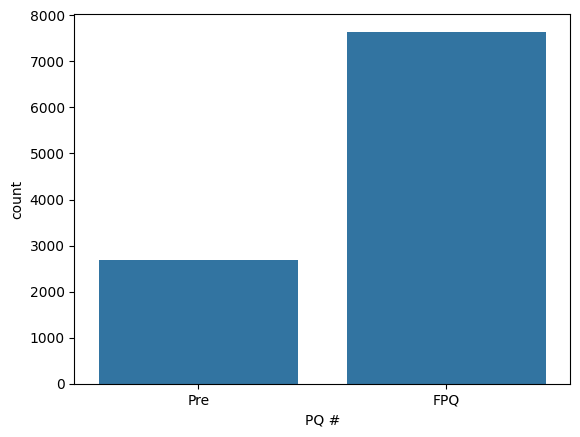

In [17]:
# Plotting bar graph using seaborn
sns.countplot(x="PQ #",data=df) # Plotting the count of each unique value in the PQ # column

In [18]:
df["PO / SO #"].nunique() # Checking the number of unique values in the PO / SO # column

6233

In [19]:
df["PO / SO #"].unique() #  Checking the unique values in the PO / SO # column

array(['SCMS-4', 'SCMS-13', 'SCMS-20', ..., 'SO-51424', 'SO-51420',
       'SO-51680'], dtype=object)

In [20]:
# Removing the characters after - from PO / SO #
df["PO / SO #"]=df["PO / SO #"].str.split("-").str[0] # Using str.split() and str[0] to remove the characters after -

In [21]:
df["PO / SO #"].unique() # Checking the unique values in the PO / SO # column

array(['SCMS', 'DSCM', 'SO'], dtype=object)

<Axes: xlabel='PO / SO #', ylabel='count'>

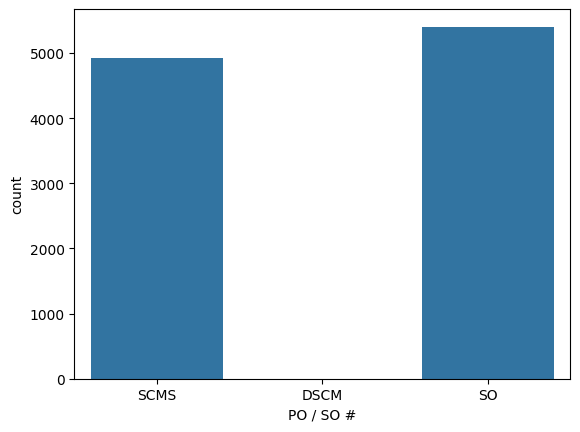

In [22]:
# Plotting bar graph using seaborn
sns.countplot(x="PO / SO #",data=df) # Plotting the count of each unique value in the PO / SO # column

In [23]:
df["ASN/DN #"].nunique() # Checking the number of unique values in the ASN/DN # column

7030

In [24]:
df["ASN/DN #"].unique() # Checking the unique values in the ASN/DN # column

array(['ASN-8', 'ASN-85', 'ASN-14', ..., 'DN-4276', 'DN-4279', 'DN-4334'],
      dtype=object)

In [25]:
# Removing the characters after - from ASN/DN #
df["ASN/DN #"]=df["ASN/DN #"].str.split("-").str[0] # Using str.split() and str[0] to remove the characters after -

In [26]:
df["ASN/DN #"].unique() # Checking the unique values in the ASN/DN # column

array(['ASN', 'DN'], dtype=object)

<Axes: xlabel='ASN/DN #', ylabel='count'>

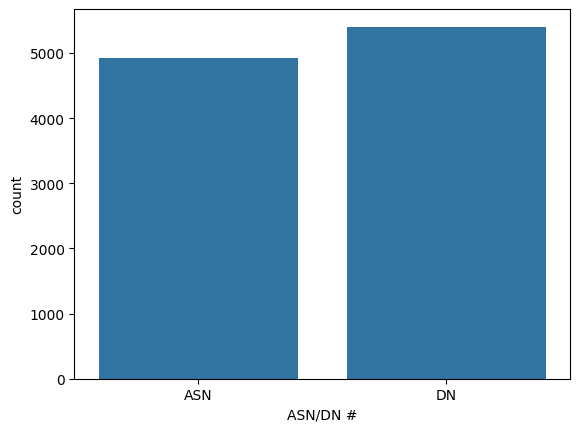

In [27]:
# Plotting bar graph using seaborn
sns.countplot(x="ASN/DN #",data=df) # Plotting the count of each unique value in the ASN/DN # column

In [28]:
df["Country"].value_counts() # Checking the count of each unique value in the Country column

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [29]:
# Grouping the countries having count less than 100 as Others in Country column
df["Country"] = np.where(df["Country"].map(df["Country"].value_counts()) < 100, "Others", df["Country"]) # Using np.where() to group the countries

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, "Côte d'Ivoire"),
  Text(1, 0, 'Vietnam'),
  Text(2, 0, 'Nigeria'),
  Text(3, 0, 'Zambia'),
  Text(4, 0, 'Tanzania'),
  Text(5, 0, 'Rwanda'),
  Text(6, 0, 'Haiti'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'Ethiopia'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Guyana'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Mozambique'),
  Text(13, 0, 'Kenya'),
  Text(14, 0, 'Uganda'),
  Text(15, 0, 'South Sudan'),
  Text(16, 0, 'Congo, DRC')])

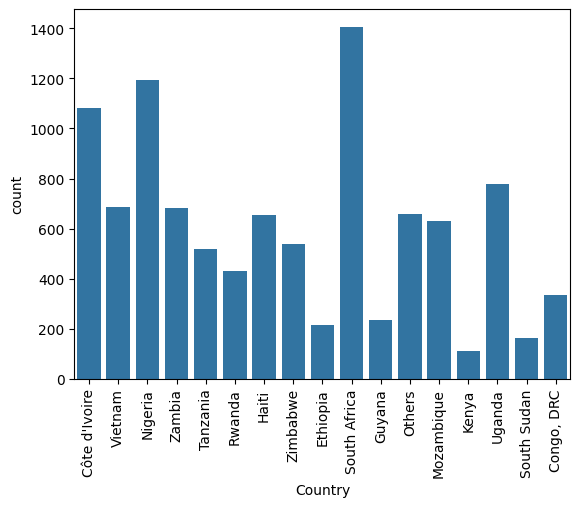

In [30]:
# Plotting bar graph using seaborn
sns.countplot(x="Country",data=df) # Plotting the count of each unique value in the Country column
plt.xticks(rotation=90) # Rotating the x-axis labels

In [31]:
df["Managed By"].value_counts() # Checking the count of each unique value in the Managed By column

PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: Managed By, dtype: int64

In [32]:
# Dropping the column as it is of no use
df.drop("Managed By",axis=1,inplace=True)

In [33]:
df["Fulfill Via"].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

<Axes: xlabel='Fulfill Via', ylabel='count'>

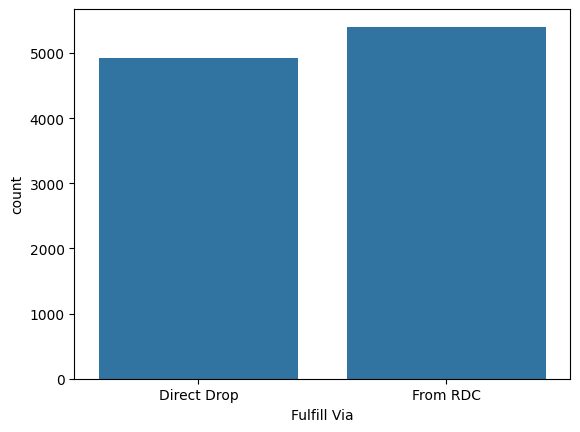

In [34]:
# Plotting bar graph using seaborn
sns.countplot(x="Fulfill Via",data=df)


In [35]:
df["Vendor INCO Term"].value_counts() # Checking the count of each unique value in the Vendor INCO Term column

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64

<Axes: xlabel='Vendor INCO Term', ylabel='count'>

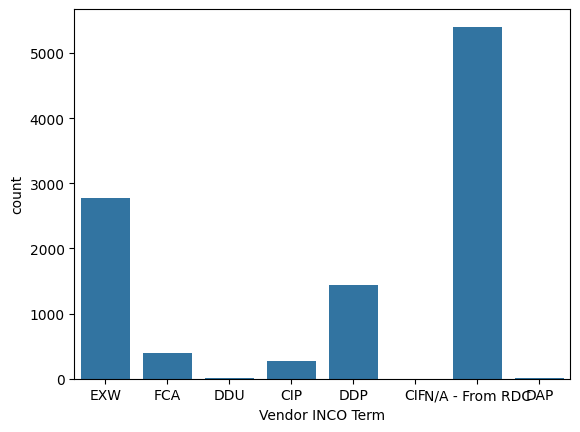

In [36]:
# Plotting bar graph using seaborn
sns.countplot(x="Vendor INCO Term",data=df)

In [37]:
df["Shipment Mode"].value_counts() # Checking the count of each unique value in the Shipment Mode column

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

<Axes: xlabel='Shipment Mode', ylabel='count'>

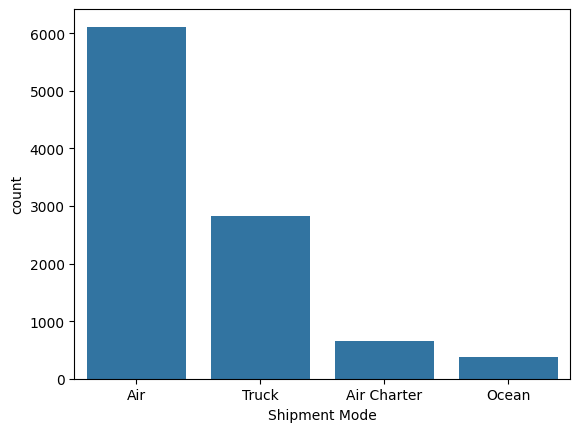

In [38]:
# Plotting bar graph using seaborn
sns.countplot(x="Shipment Mode",data=df) # Plotting the count of each unique value in the Shipment Mode column

In [39]:
# Filling missing values of Shipment Mode with Mode
df["Shipment Mode"].fillna("Mode",inplace=True)

In [40]:
# Dropping
# PQ First Sent to Client Date
# PO Sent to Vendor Date
# Scheduled Delivery Date
# Delivered to Client Date
# Delivery Recorded Date as dates are of no use
df.drop(["PQ First Sent to Client Date","PO Sent to Vendor Date","Scheduled Delivery Date","Delivered to Client Date","Delivery Recorded Date"],axis=1,inplace=True)

In [41]:
df["Product Group"].value_counts() # Checking the count of each unique value in the Product Group column

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

<Axes: xlabel='Product Group', ylabel='count'>

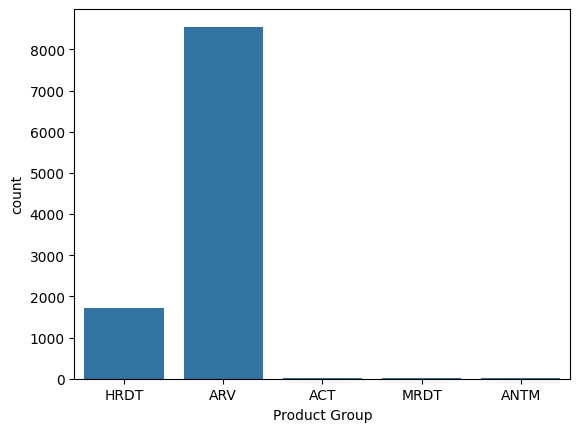

In [42]:
# Plotting bar graph using seaborn
sns.countplot(x="Product Group",data=df)

In [43]:
df["Sub Classification"].value_counts() # Checking the count of each unique value in the Sub Classification column

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

<Axes: xlabel='Sub Classification', ylabel='count'>

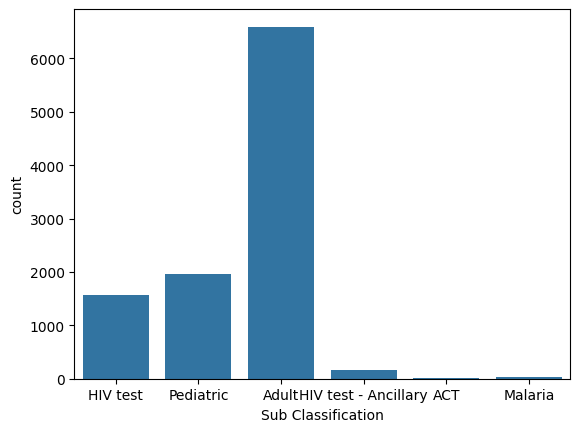

In [44]:
# Plotting bar graph using seaborn
sns.countplot(x="Sub Classification",data=df)

In [45]:
df["Vendor"].value_counts() # Checking the count of each unique value in the Vendor column

SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: Vendor, Length: 73, dtype: int64

In [46]:
# Dropping the column as it is of no use
df.drop("Vendor",axis=1,inplace=True)

In [47]:
df["Item Description"].value_counts() # Checking the count of each unique value in the Item Description column

Efavirenz 600mg, tablets, 30 Tabs                                                755
Nevirapine 200mg, tablets, 60 Tabs                                               623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: Item Description, Length: 184, dtype: int64

In [48]:
# Dropping the column as it is of no use
df.drop("Item Description",axis=1,inplace=True) # Dropping the column

In [49]:
df["Molecule/Test Type"].value_counts() # Checking the count of each unique value in the Molecule/Test Type column

Efavirenz                           1125
Nevirapine                           877
Lamivudine/Nevirapine/Zidovudine     707
Lamivudine/Zidovudine                689
Lopinavir/Ritonavir                  633
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: Molecule/Test Type, Length: 86, dtype: int64

In [50]:
# Dropping the column as it is of no use
df.drop("Molecule/Test Type",axis=1,inplace=True) # Dropping the column

In [51]:
df["Brand"].value_counts() # Checking the count of each unique value in the Brand column

Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb      

In [52]:
# Dropping the column as it is of no use
df.drop("Brand",axis=1,inplace=True)

In [53]:
df["Dosage"].value_counts() # Checking the count of each unique value in the Dosage column

300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/300mg+6

In [54]:
# Dropping the column as it is of no use
df.drop("Dosage",axis=1,inplace=True)

In [55]:
df["Dosage Form"].value_counts() # Checking the count of each unique value in the Dosage Form column

Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64

In [56]:
# Dropping the column as it is of no use
df.drop("Dosage Form",axis=1,inplace=True)

In [57]:
df["Unit of Measure (Per Pack)"].value_counts() # Checking the count of each unique value in the Unit of Measure (Per Pack) column

60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: Unit of Measure (Per Pack), dtype: int64

<Axes: xlabel='Unit of Measure (Per Pack)', ylabel='Density'>

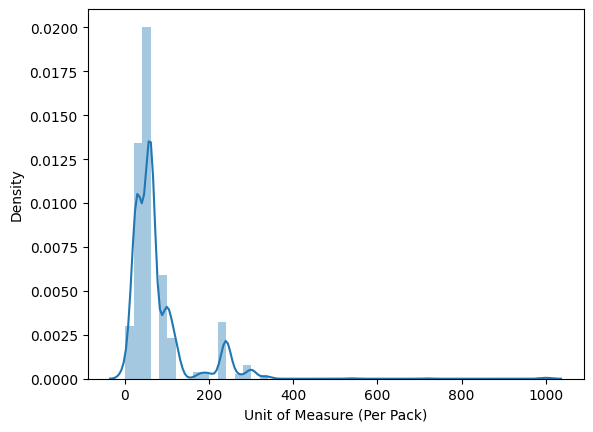

In [58]:
# Plotting histogram with distribution
sns.distplot(df["Unit of Measure (Per Pack)"], kde=True)


<Axes: ylabel='Unit of Measure (Per Pack)'>

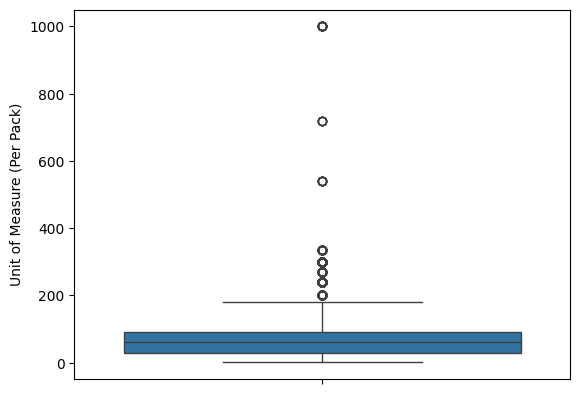

In [59]:
# Using boxplot
sns.boxplot(df["Unit of Measure (Per Pack)"])

In [60]:
# Create a new column 'Unit of Measure (Per Pack)log' as the log-transformed version of the original column
df['Unit of Measure (Per Pack)log'] = df['Unit of Measure (Per Pack)'].apply(lambda x: 0 if x == 0 else np.log(x))

# Identify outliers using 1.5 times the interquartile range (IQR)
Q1 = df['Unit of Measure (Per Pack)log'].quantile(0.25)
Q3 = df['Unit of Measure (Per Pack)log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Unit of Measure (Per Pack)log'] < (Q1 - 1.5 * IQR)) | (df['Unit of Measure (Per Pack)log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Unit of Measure (Per Pack)log'] = df.loc[~outlier_mask, 'Unit of Measure (Per Pack)log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

# Optionally, create a new column for capped values
df['Unit of Measure (Per Pack)log_capped'] = df['Unit of Measure (Per Pack)log']

<Axes: ylabel='Unit of Measure (Per Pack)log_capped'>

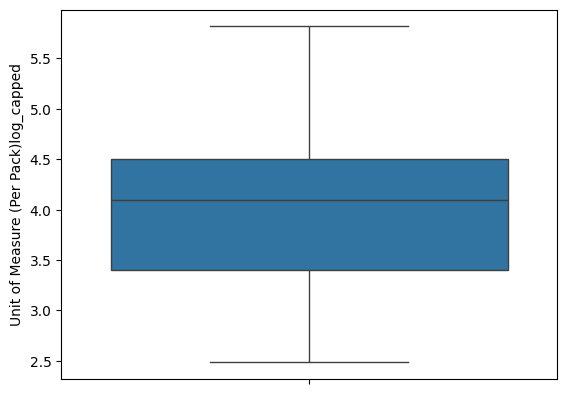

In [61]:
# Checking outliers using boxplot
sns.boxplot(df["Unit of Measure (Per Pack)log_capped"])

<Axes: xlabel='Unit of Measure (Per Pack)log_capped', ylabel='Density'>

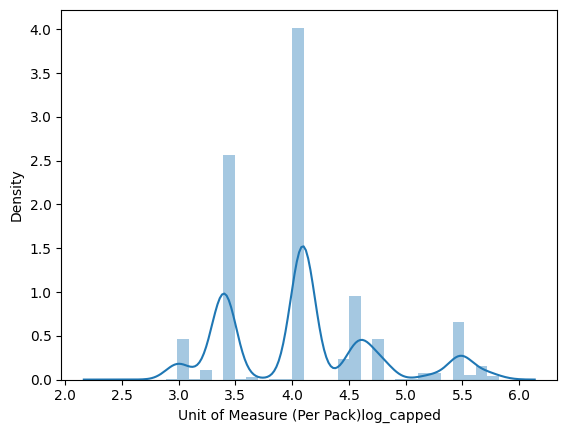

In [62]:
# Checking using histogram
sns.distplot(df["Unit of Measure (Per Pack)log_capped"], kde=True)

In [63]:
# Dropping the column 'Unit of Measure (Per Pack)log' as it is of no use
df.drop(['Unit of Measure (Per Pack)log', 'Unit of Measure (Per Pack)'], axis=1, inplace=True)


In [64]:
# Checking missing values
df["Unit of Measure (Per Pack)log_capped"].isnull().sum()

170

In [65]:
# Filling missing values with median
df["Unit of Measure (Per Pack)log_capped"].fillna(df["Unit of Measure (Per Pack)log_capped"].median(), inplace=True)

In [66]:
df["Line Item Quantity"].value_counts() # Checking the count of each unique value in the Line Item Quantity column

10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: Line Item Quantity, Length: 5065, dtype: int64

<Axes: xlabel='Line Item Quantity', ylabel='Density'>

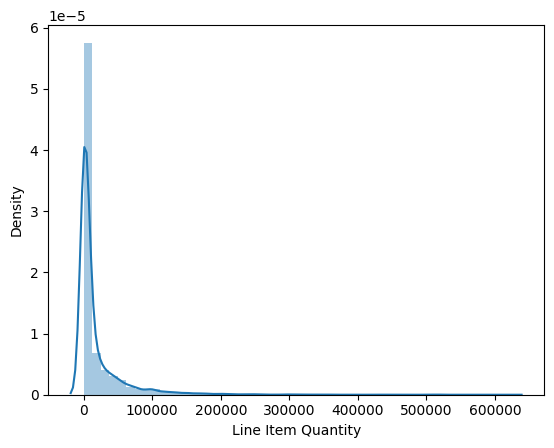

In [67]:
# Plotting histogram with distribution
sns.distplot(df["Line Item Quantity"], kde=True)

<Axes: ylabel='Line Item Quantity'>

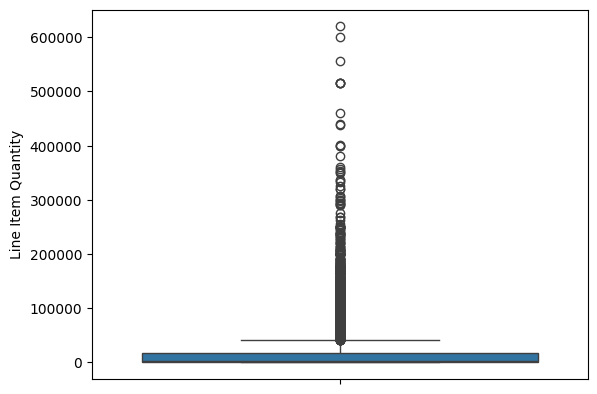

In [68]:
# Checking outliers using boxplot
sns.boxplot(df["Line Item Quantity"])

In [69]:
#  Log transformation
df['Line Item Quantity_log'] = np.log1p(df['Line Item Quantity'])

# Remove extreme outliers using IQR
Q1 = df['Line Item Quantity_log'].quantile(0.25)
Q3 = df['Line Item Quantity_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Line Item Quantity_log'] < (Q1 - 1.5 * IQR)) | (df['Line Item Quantity_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Line Item Quantity_log'] = df.loc[~outlier_mask, 'Line Item Quantity_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

<Axes: ylabel='Line Item Quantity_log'>

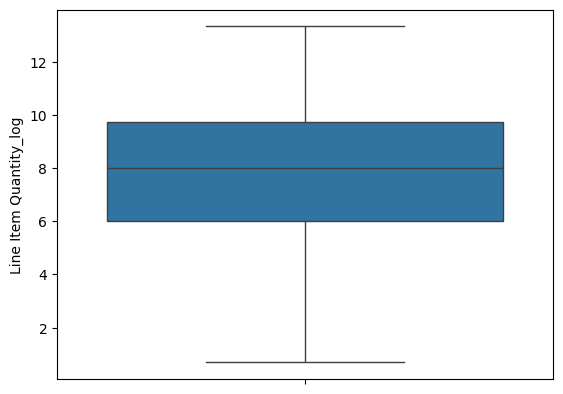

In [70]:
# Checking outliers using boxplot
sns.boxplot(df["Line Item Quantity_log"])

<Axes: xlabel='Line Item Quantity_log', ylabel='Density'>

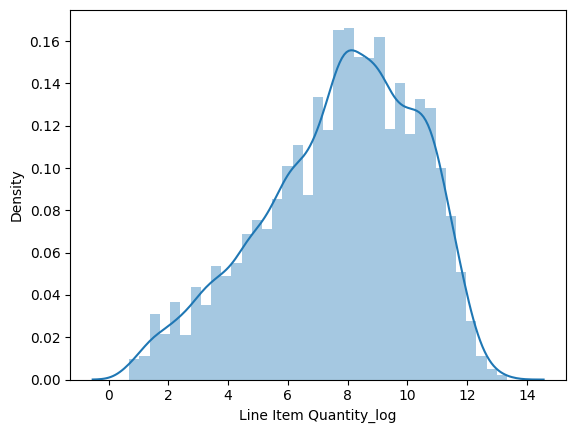

In [71]:
# Checking using histogram
sns.distplot(df["Line Item Quantity_log"], kde=True)

In [72]:
df["Line Item Value"].value_counts() # Checking the count of each unique value in the Line Item Value column

200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
415552.08     1
561.46        1
438340.92     1
2604.00       1
72911.61      1
Name: Line Item Value, Length: 8741, dtype: int64

<Axes: xlabel='Line Item Value', ylabel='Density'>

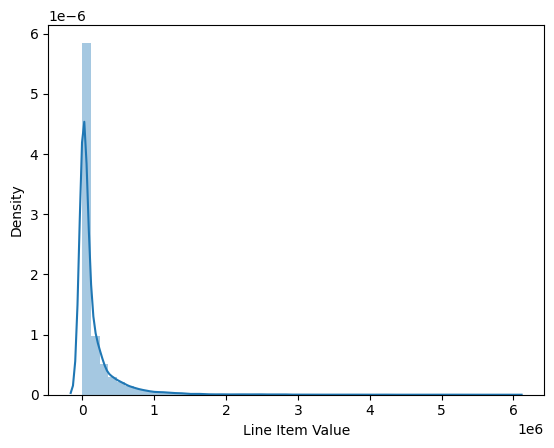

In [73]:
# Plotting histogram with distribution
sns.distplot(df["Line Item Value"], kde=True)

<Axes: ylabel='Line Item Value'>

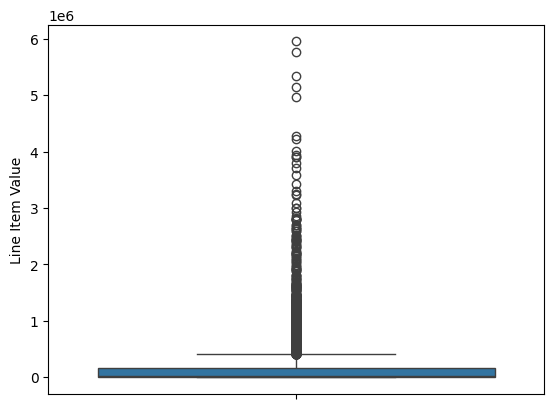

In [74]:
# Checking outliers using boxplot
sns.boxplot(df["Line Item Value"]) # Checking the count of each unique value in the Line Item Value column

In [75]:
#Log transformation
df['Line Item Value_log'] = np.log1p(df['Line Item Value'])

#Remove extreme outliers using IQR
Q1 = df['Line Item Value_log'].quantile(0.25)
Q3 = df['Line Item Value_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Line Item Value_log'] < (Q1 - 1.5 * IQR)) | (df['Line Item Value_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Line Item Value_log'] = df.loc[~outlier_mask, 'Line Item Value_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

<Axes: ylabel='Line Item Value_log'>

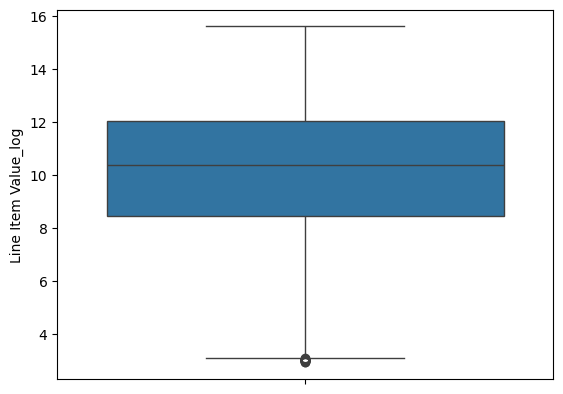

In [76]:
# Checking outliers using boxplot
sns.boxplot(df["Line Item Value_log"])

In [77]:
# Checking missing values
df["Line Item Value_log"].isnull().sum()

109

In [78]:
# Filling missing values with median
df["Line Item Value_log"].fillna(df["Line Item Value_log"].median(), inplace=True)

In [79]:
df["Pack Price"].value_counts()  # Checking the count of each unique value in the Pack Price column

32.00    368
80.00    307
89.00    183
11.22    139
20.00    110
        ... 
12.37      1
16.80      1
19.56      1
10.84      1
1.38       1
Name: Pack Price, Length: 1175, dtype: int64

<Axes: xlabel='Pack Price', ylabel='Density'>

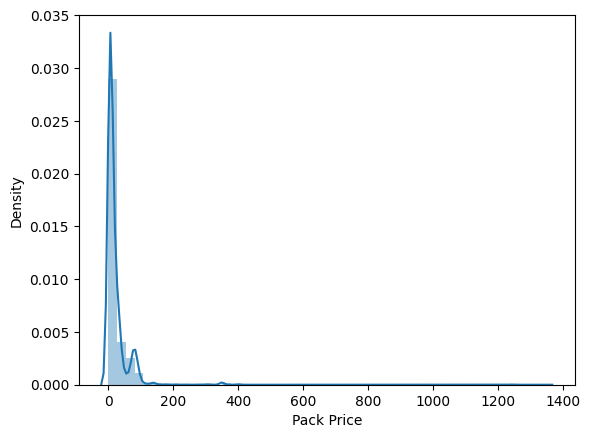

In [80]:
# Plotting histogram with distribution
sns.distplot(df["Pack Price"], kde=True)

<Axes: ylabel='Pack Price'>

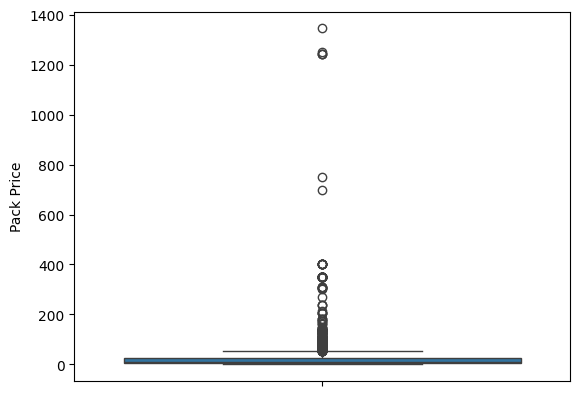

In [81]:
# Checking outliers using boxplot
sns.boxplot(df["Pack Price"])

In [82]:
# Log transformation
df['Pack Price_log'] = np.log1p(df['Pack Price'])

# Remove extreme outliers using IQR
Q1 = df['Pack Price_log'].quantile(0.25)
Q3 = df['Pack Price_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Pack Price_log'] < (Q1 - 1.5 * IQR)) | (df['Pack Price_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Pack Price_log'] = df.loc[~outlier_mask, 'Pack Price_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

<Axes: ylabel='Pack Price_log'>

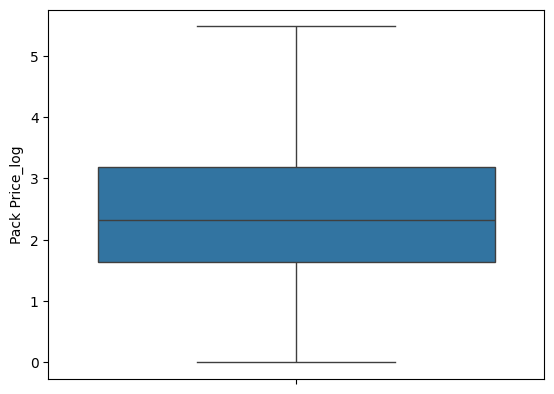

In [83]:
# Checking outliers using boxplot
sns.boxplot(df["Pack Price_log"])

<Axes: xlabel='Pack Price_log', ylabel='Density'>

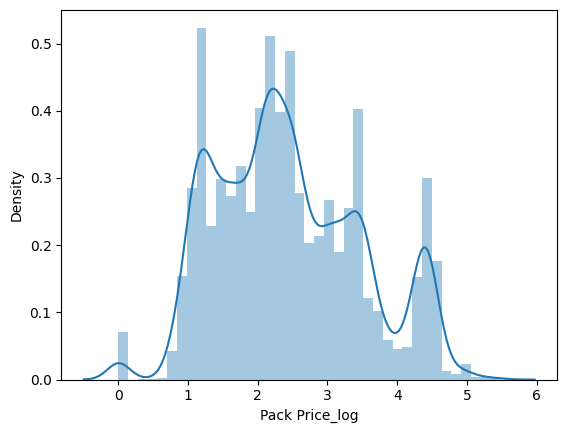

In [84]:
# Checking using histogram
sns.distplot(df["Pack Price_log"], kde=True)

In [85]:
df["Unit Price"].value_counts() # Checking the count of each unique value in the Unit Price column

0.04     713
0.01     492
0.12     464
0.14     444
0.80     411
        ... 
3.25       1
1.21       1
1.80       1
1.48       1
26.91      1
Name: Unit Price, Length: 183, dtype: int64

<Axes: xlabel='Unit Price', ylabel='Density'>

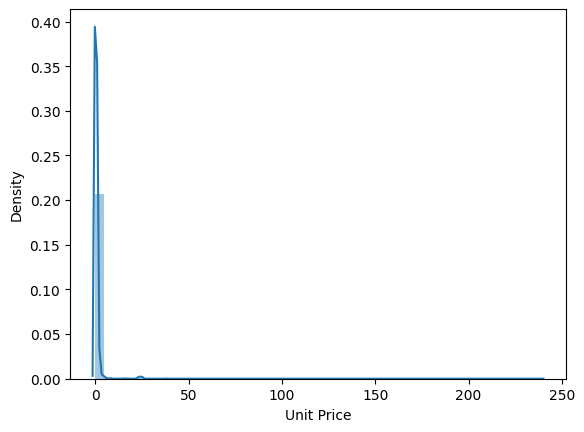

In [86]:
# Plotting histogram with distribution
sns.distplot(df["Unit Price"], kde=True)

<Axes: ylabel='Unit Price'>

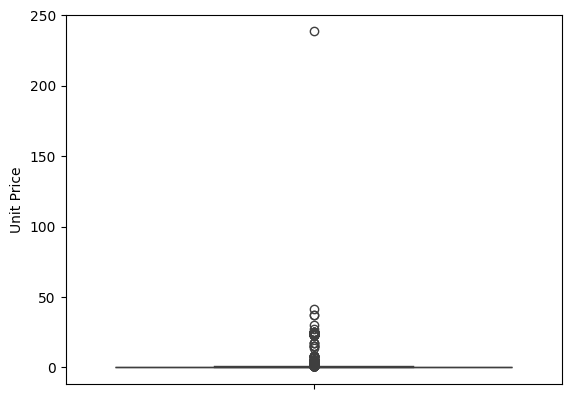

In [87]:
# Checking outliers using boxplot
sns.boxplot(df["Unit Price"])

In [88]:
# Step 2: Log transformation
df['Unit Price_log'] = np.log1p(df['Unit Price'])

# Step 3: Remove extreme outliers using IQR
Q1 = df['Unit Price_log'].quantile(0.25)
Q3 = df['Unit Price_log'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for outliers
outlier_mask = (df['Unit Price_log'] < (Q1 - 1.5 * IQR)) | (df['Unit Price_log'] > (Q3 + 1.5 * IQR))

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outlier_mask, 'Unit Price_log'] = df.loc[~outlier_mask, 'Unit Price_log'].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))


<Axes: ylabel='Unit Price_log'>

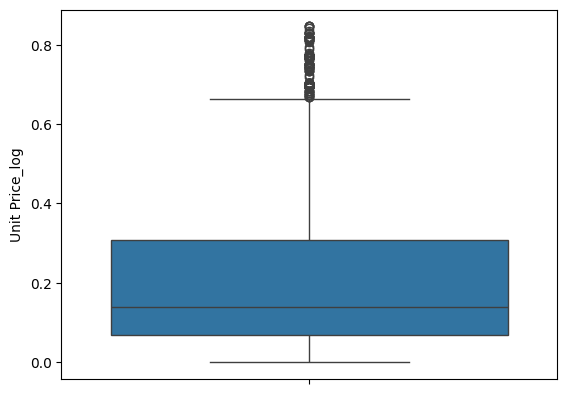

In [89]:
# Checking using boxplot
sns.boxplot(df["Unit Price_log"])

In [90]:
df["Unit Price_log"].describe()

count    9526.000000
mean        0.211368
std         0.193189
min         0.000000
25%         0.067659
50%         0.139762
75%         0.307485
max         0.845868
Name: Unit Price_log, dtype: float64

In [91]:
# Checking missing values
df["Unit Price_log"].isnull().sum()

798

In [92]:
# Filling missing values with median
df["Unit Price_log"].fillna(df["Unit Price_log"].median(), inplace=True)

<Axes: xlabel='Unit Price_log', ylabel='Density'>

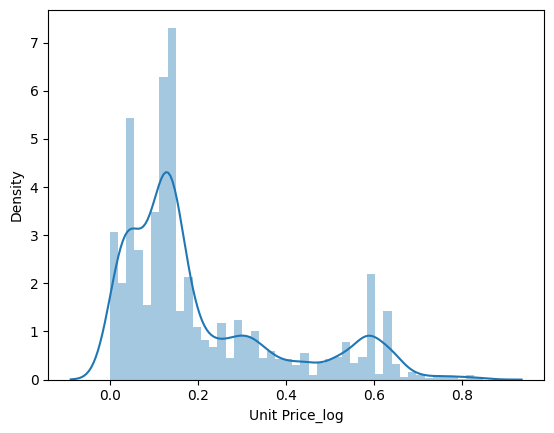

In [93]:
# Checking using histogram
sns.distplot(df["Unit Price_log"], kde=True)

In [94]:
# Checking missing values for Pack_Price_log
df["Pack Price_log"].isnull().sum()


63

In [95]:
# Filling missing values with median
df["Pack Price_log"].fillna(df["Pack Price_log"].median(), inplace=True)

In [96]:
pd.set_option('display.max_rows', None)

In [97]:
df["Manufacturing Site"].value_counts()

Aurobindo Unit III, India                                                   3172
Mylan (formerly Matrix) Nashik                                              1415
Hetero Unit III Hyderabad IN                                                 869
Cipla, Goa, India                                                            665
Strides, Bangalore, India.                                                   540
Alere Medical Co., Ltd.                                                      481
Trinity Biotech, Plc                                                         405
ABBVIE Ludwigshafen Germany                                                  366
Inverness Japan                                                              345
ABBVIE (Abbott) Logis. UK                                                    219
BMS Meymac, France                                                           148
Aspen-OSD, Port Elizabeth, SA                                                141
Chembio Diagnostics Sys. Inc

In [98]:
# Assuming your DataFrame is named 'df'
import pandas as pd

# Get the value counts for "Manufacturing Site"
manufacturing_site_counts = df["Manufacturing Site"].value_counts()

# Identify sites with counts less than 100
sites_to_merge = manufacturing_site_counts[manufacturing_site_counts < 100].index

# Replace those sites with "Other"
df["Manufacturing Site"] = df["Manufacturing Site"].replace(sites_to_merge, "Other")

# Display the updated value counts
print(df["Manufacturing Site"].value_counts())


Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Other                             1088
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
BMS Meymac, France                 148
Aspen-OSD, Port Elizabeth, SA      141
Chembio Diagnostics Sys. Inc.      124
MSD, Haarlem, NL                   121
Standard Diagnostics, Korea        114
Aurobindo Unit VII, IN             111
Name: Manufacturing Site, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Aurobindo Unit III, India'),
  Text(2, 0, 'ABBVIE Ludwigshafen Germany'),
  Text(3, 0, 'Trinity Biotech, Plc'),
  Text(4, 0, 'Cipla, Goa, India'),
  Text(5, 0, 'BMS Meymac, France'),
  Text(6, 0, 'Chembio Diagnostics Sys. Inc.'),
  Text(7, 0, 'Inverness Japan'),
  Text(8, 0, 'Standard Diagnostics, Korea'),
  Text(9, 0, 'Mylan (formerly Matrix) Nashik'),
  Text(10, 0, 'MSD, Haarlem, NL'),
  Text(11, 0, 'Aspen-OSD, Port Elizabeth, SA'),
  Text(12, 0, 'ABBVIE (Abbott) Logis. UK'),
  Text(13, 0, 'Hetero Unit III Hyderabad IN'),
  Text(14, 0, 'Strides, Bangalore, India.'),
  Text(15, 0, 'Alere Medical Co., Ltd.'),
  Text(16, 0, 'Aurobindo Unit VII, IN')])

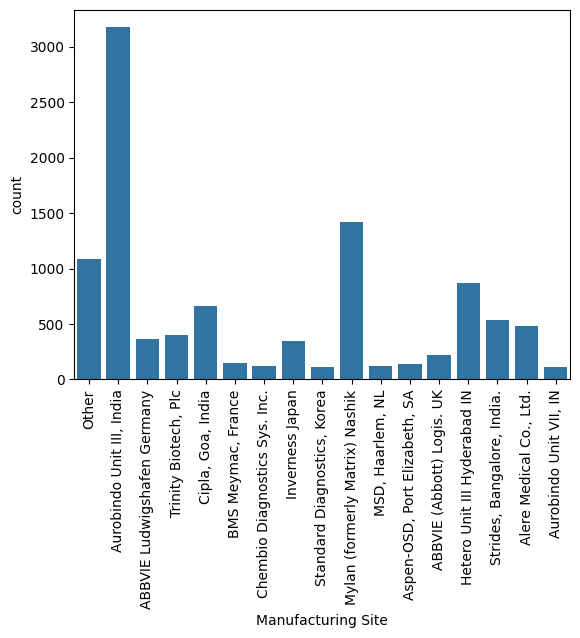

In [99]:
# Plotting bar chart
sns.countplot(x="Manufacturing Site", data=df)
plt.xticks(rotation=90)

In [100]:
df["First Line Designation"].value_counts() # Checking the count of each unique value in the First Line Designation column

Yes    7030
No     3294
Name: First Line Designation, dtype: int64

<Axes: xlabel='First Line Designation', ylabel='count'>

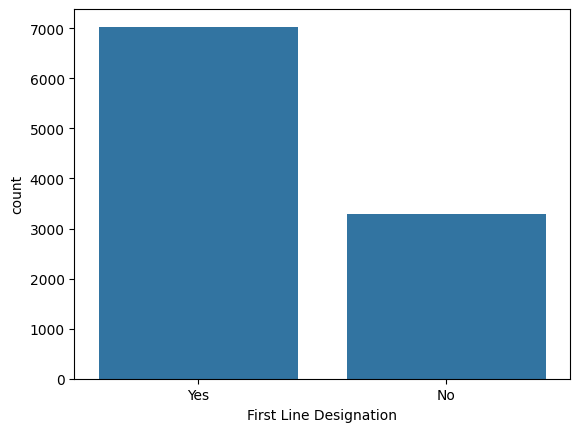

In [101]:
# Plotting bar chart
sns.countplot(x="First Line Designation", data=df)

In [102]:
df["Weight (Kilograms)"].value_counts() # Checking the count of each unique value in the Weight (Kilograms) column

Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
5                               20
4                               19
3                               18
14                              17
21                              17
18                              17
12                              17
17                              17
9                               17
39                              17
36                              17
25                              16
22                              16
76                              16
See DN-304 (ID#:10589)          16
7                               16
58                              16
15                              15
46                              15
54                              15
13                              15
24                              15
30                              15
16                  

In [103]:
# Dropping df["Weight (Kilograms)"]
df.drop("Weight (Kilograms)", axis=1, inplace=True) # Drop the "Weight (Kilograms)" column

In [104]:
df["Freight Cost (USD)"].value_counts() # Checking the count of each unique value in the Freight Cost (USD) column

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
See DN-304 (ID#:10589)                  16
7445.8                                  16
9341.49                                 15
See ASN-32231 (ID#:13648)               14
See ASN-31750 (ID#:19272)               14
See ASN-28279 (ID#:13547)               13
7329.83                                 12
See DN-3015 (ID#:82554)                 12
1211.48                                 11
25231.96                                11
17090                                   10
15322.73                                10
15459.09                                10
15128.37                                10
See DN-2035 (ID#:82356)                 10
14547.55                                10
See ASN-26738 (ID#:15115)               10
16532.5                                 10
See DN-3561

In [105]:
# Replace "Freight Included in Commodity Cost" with 0
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].replace("Freight Included in Commodity Cost", 0)

In [106]:
# Replace "Invoiced Separately" with 0
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].replace("Invoiced Separately", 0)

In [107]:
# Convert "Freight Cost (USD)" to numeric with errors='coerce'
df["Freight Cost (USD)"] = pd.to_numeric(df["Freight Cost (USD)"], errors='coerce')

In [108]:
# Filling Freight Cost (USD) missing values with median
df["Freight Cost (USD)"] = df["Freight Cost (USD)"].fillna(df["Freight Cost (USD)"].median())

<Axes: ylabel='Freight Cost (USD)'>

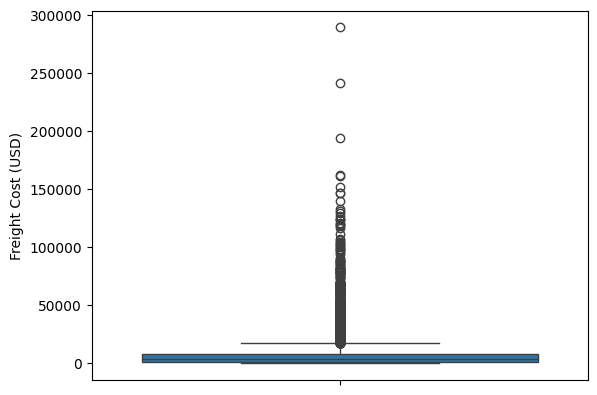

In [109]:
# Checking outliers using boxplot
sns.boxplot(df["Freight Cost (USD)"])

In [110]:
# Step 1: Log transformation
df["Freight Cost (USD)_log"] = np.log1p(df["Freight Cost (USD)"])

# Step 2: Identify outliers using Tukey's method on the log-transformed values
Q1 = df["Freight Cost (USD)_log"].quantile(0.25)
Q3 = df["Freight Cost (USD)_log"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (df["Freight Cost (USD)_log"] < lower_bound) | (df["Freight Cost (USD)_log"] > upper_bound)

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outliers_mask, "Freight Cost (USD)_log"] = df.loc[~outliers_mask, "Freight Cost (USD)_log"].clip(lower=lower_bound, upper=upper_bound)




<Axes: ylabel='Freight Cost (USD)_log'>

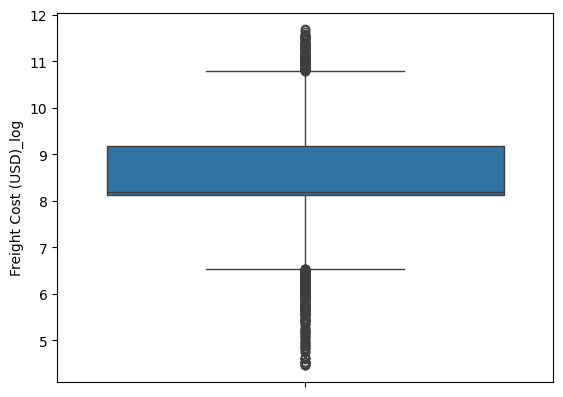

In [111]:
# Boxplot after log transformation
sns.boxplot(df["Freight Cost (USD)_log"])

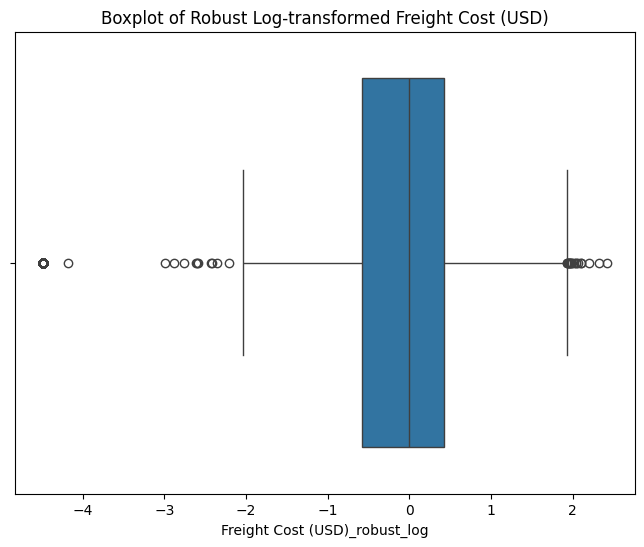

0       -0.830197
1        0.132653
2       -0.418686
3        0.825820
4        1.398079
5        0.280448
6       -4.482960
7        0.306843
8        0.000000
9       -4.482960
10      -4.482960
11       0.735231
12      -4.482960
13       1.587304
14      -0.384470
15      -4.482960
16      -4.482960
17      -0.070624
18      -0.744224
19      -0.153576
20       0.821924
21      -4.482960
22       0.091364
23      -0.382276
24      -0.004869
25      -0.074653
26       1.129889
27       1.141402
28       1.139447
29       0.678582
30       0.971703
31      -4.482960
32      -0.242068
33      -0.275108
34      -4.176078
35      -4.482960
36      -4.482960
37      -4.482960
38       0.234703
39      -0.158987
40      -4.482960
41      -1.253619
42      -4.482960
43       0.080667
44       0.236951
45      -0.398710
46       0.072457
47      -4.482960
48      -4.482960
49      -0.259518
50      -4.482960
51       0.828662
52      -4.482960
53      -4.482960
54       0.732737
55      -4

In [112]:
from sklearn.preprocessing import RobustScaler

# Step 1: Apply RobustScaler for robust log transformation
scaler = RobustScaler()
df["Freight Cost (USD)_robust_log"] = scaler.fit_transform(df[["Freight Cost (USD)"]].apply(np.log1p))

# Step 2: Visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Freight Cost (USD)_robust_log"])
plt.title('Boxplot of Robust Log-transformed Freight Cost (USD)')
plt.show()

# Display the DataFrame with the new columns
print(df["Freight Cost (USD)_robust_log"])


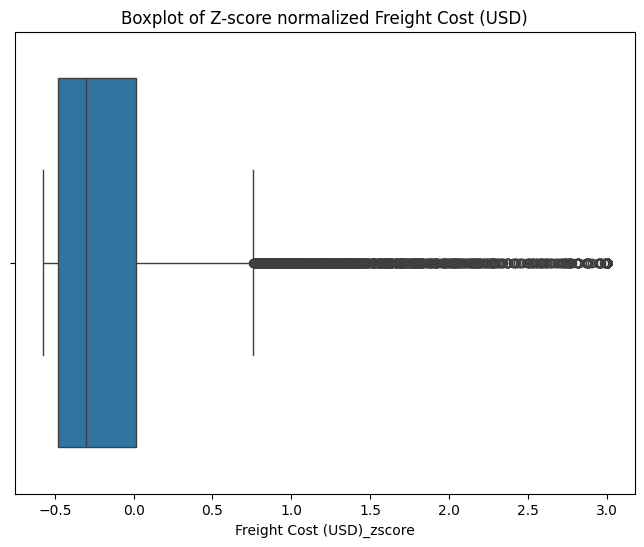

0       -0.514749
1       -0.228440
2       -0.447905
3        0.650544
4        2.903802
5       -0.121381
6       -0.574468
7       -0.099035
8       -0.302806
9       -0.574468
10      -0.574468
11       0.463998
12      -0.574468
13       3.000000
14      -0.439752
15      -0.574468
16      -0.574468
17      -0.335642
18      -0.504600
19      -0.369180
20       0.641869
21      -0.574468
22      -0.253542
23      -0.439211
24      -0.305208
25      -0.337391
26       1.558388
27       1.603645
28       1.595892
29       0.362070
30       1.023910
31      -0.574468
32      -0.399784
33      -0.410002
34      -0.574410
35      -0.574468
36      -0.574468
37      -0.574468
38      -0.157649
39      -0.371196
40      -0.574468
41      -0.546917
42      -0.574468
43      -0.259744
44      -0.155937
45      -0.443207
46      -0.264421
47      -0.574468
48      -0.574468
49      -0.405257
50      -0.574468
51       0.656908
52      -0.574468
53      -0.574468
54       0.459286
55      -0

In [113]:
from scipy.stats import zscore

# Step 1: Calculate z-scores for the "Freight Cost (USD)"
df["Freight Cost (USD)_zscore"] = zscore(df["Freight Cost (USD)"])

# Step 2: Identify and handle outliers (considering z-score threshold, e.g., 3)
zscore_threshold = 3
outliers_mask = (df["Freight Cost (USD)_zscore"].abs() > zscore_threshold)

# Cap outliers to the threshold value
df.loc[outliers_mask, "Freight Cost (USD)_zscore"] = np.sign(df.loc[outliers_mask, "Freight Cost (USD)_zscore"]) * zscore_threshold

# Display boxplot for visual verification
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Freight Cost (USD)_zscore"])
plt.title('Boxplot of Z-score normalized Freight Cost (USD)')
plt.show()

# Display the DataFrame with the new columns
print(df["Freight Cost (USD)_zscore"])


In [114]:
# Checking missing values
df["Line Item Insurance (USD)"].isnull().sum()

287

In [115]:
# Filling missing values with median
df["Line Item Insurance (USD)"].fillna(df["Line Item Insurance (USD)"].median(), inplace=True)

<Axes: ylabel='Line Item Insurance (USD)'>

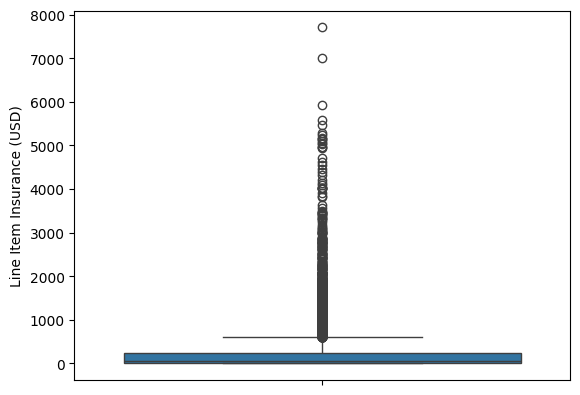

In [116]:
# Checking outliers using boxplot
sns.boxplot(df["Line Item Insurance (USD)"])


In [117]:
# Step 1: Log transformation
df["Line Item Insurance (USD)_log"] = np.log1p(df["Line Item Insurance (USD)"])

# Step 2: Identify outliers using Tukey's method on the log-transformed values
Q1 = df["Line Item Insurance (USD)_log"].quantile(0.25)
Q3 = df["Line Item Insurance (USD)_log"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (df["Line Item Insurance (USD)_log"] < lower_bound) | (df["Line Item Insurance (USD)_log"] > upper_bound)

# Cap outliers to the nearest value within 1.5 times IQR
df.loc[outliers_mask, "Line Item Insurance (USD)_log"] = df.loc[~outliers_mask, "Line Item Insurance (USD)_log"].clip(lower=lower_bound, upper=upper_bound)


<Axes: ylabel='Line Item Insurance (USD)_log'>

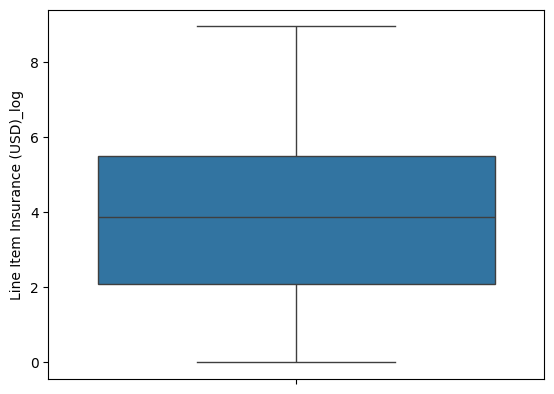

In [118]:
# Plot boxplot
sns.boxplot(df["Line Item Insurance (USD)_log"])

In [119]:
# Check missing values
df["Line Item Insurance (USD)_log"].isnull().sum()

0

In [120]:
# Filling the missing values with median
df["Line Item Insurance (USD)_log"] = df["Line Item Insurance (USD)_log"].fillna(df["Line Item Insurance (USD)_log"].median())

In [121]:
columns_to_delete = ["Line Item Quantity", "Line Item Value", "Pack Price", "Unit Price",
                      "Line Item Insurance (USD)", "Line Item Insurance (USD)_capped",
                      "Freight Cost (USD)_log", "Freight Cost (USD)", "Freight Cost (USD)_zscore"]

# Drop the specified columns
df = df.drop(columns=columns_to_delete, errors='ignore')

# Display the updated DataFrame
df.head()


,PQ #,PO / SO #,ASN/DN #,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Manufacturing Site,First Line Designation,Unit of Measure (Per Pack)log_capped,Line Item Quantity_log,Line Item Value_log,Pack Price_log,Unit Price_log,Freight Cost (USD)_robust_log,Line Item Insurance (USD)_log
0,Pre,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,HRDT,HIV test,Other,Yes,3.401197,2.995732,6.313548,3.401197,0.678034,-0.830197,3.872034
1,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,"Aurobindo Unit III, India",Yes,5.480639,6.908755,8.732466,1.974081,0.029559,0.132653,3.872034
2,Pre,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,HRDT,HIV test,Other,Yes,4.605170,6.216606,10.596660,4.394449,0.587787,-0.418686,3.872034
3,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Other,Yes,4.094345,10.371019,11.754787,1.607436,0.067659,0.825820,3.872034
4,Pre,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,"Aurobindo Unit III, India",Yes,4.094345,10.545368,11.708500,1.435085,0.048790,1.398079,3.872034


In [122]:
df.isnull().sum()

PQ #                                    0
PO / SO #                               0
ASN/DN #                                0
Country                                 0
Fulfill Via                             0
Vendor INCO Term                        0
Shipment Mode                           0
Product Group                           0
Sub Classification                      0
Manufacturing Site                      0
First Line Designation                  0
Unit of Measure (Per Pack)log_capped    0
Line Item Quantity_log                  0
Line Item Value_log                     0
Pack Price_log                          0
Unit Price_log                          0
Freight Cost (USD)_robust_log           0
Line Item Insurance (USD)_log           0
dtype: int64

In [123]:
# Use pd.get_dummies() to perform one-hot encoding on object columns
df = pd.get_dummies(df, drop_first=True)
# This will handle both identifying object columns and performing one-hot encoding in a single step


In [124]:
df.shape

(10324, 65)

In [126]:
# Calculate the correlation between "Line Item Value_log" and other variables
correlation = df.corrwith(df["Line Item Value_log"])

# Sort the correlation values in descending order
correlation_sorted = correlation.sort_values(ascending=False)

# Display the top 3 factors from a business perspective
top_factors = correlation_sorted

# Print the top 3 factors
print("Top 3 factors from a business perspective:")
print(top_factors)


Top 3 factors from a business perspective:
Line Item Value_log                                  1.000000
Line Item Insurance (USD)_log                        0.956732
Line Item Quantity_log                               0.873926
Freight Cost (USD)_robust_log                        0.460239
First Line Designation_Yes                           0.254467
Sub Classification_Adult                             0.239375
Country_Zambia                                       0.186188
Manufacturing Site_Mylan (formerly Matrix) Nashik    0.172560
Fulfill Via_From RDC                                 0.163118
Vendor INCO Term_N/A - From RDC                      0.163118
PO / SO #_SO                                         0.163118
ASN/DN #_DN                                          0.163118
Unit Price_log                                       0.151754
Shipment Mode_Ocean                                  0.144122
Shipment Mode_Air Charter                            0.134269
Country_Nigeria            

In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df.drop("Line Item Value_log", axis=1)  # Features
y = df[["Line Item Value_log"]]  # Target variable

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shapes: X_train =", X_train.shape, "y_train =", y_train.shape)
print("Testing set shapes: X_test =", X_test.shape, "y_test =", y_test.shape)

Training set shapes: X_train = (7226, 17) y_train = (7226, 1)
Testing set shapes: X_test = (3098, 17) y_test = (3098, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training features
X_train = scaler.fit_transform(X_train)

# Transform the test features using the same scaler
X_test= scaler.transform(X_test)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_linear_reg = linear_reg_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_linear_reg = mean_squared_error(y_train, y_train_pred_linear_reg)
rmse_train_linear_reg = np.sqrt(mse_train_linear_reg)
mae_train_linear_reg = mean_absolute_error(y_train, y_train_pred_linear_reg)
r2_train_linear_reg = r2_score(y_train, y_train_pred_linear_reg)
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r2_train_linear_reg = 1 - (1 - r2_train_linear_reg) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_linear_reg = mean_squared_error(y_test, y_test_pred_linear_reg)
rmse_test_linear_reg = np.sqrt(mse_test_linear_reg)
mae_test_linear_reg = mean_absolute_error(y_test, y_test_pred_linear_reg)
r2_test_linear_reg = r2_score(y_test, y_test_pred_linear_reg)
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r2_test_linear_reg = 1 - (1 - r2_test_linear_reg) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Linear Regression model
print("\nLinear Regression Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_train_linear_reg)
print("Mean Absolute Error (MAE):", mae_train_linear_reg)
print("R-squared (R2):", r2_train_linear_reg)
print("Adjusted R-squared:", adj_r2_train_linear_reg)
print("\nLinear Regression Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_test_linear_reg)
print("Mean Absolute Error (MAE):", mae_test_linear_reg)
print("R-squared (R2):", r2_test_linear_reg)
print("Adjusted R-squared:", adj_r2_test_linear_reg)



Linear Regression Model Metrics - Training Set:
Mean Squared Error (MSE): 0.33564892544226577
Root Mean Squared Error (RMSE): 0.5793521601256577
Mean Absolute Error (MAE): 0.25413326943348136
R-squared (R2): 0.9431504659696893
Adjusted R-squared: 0.9430163868799952

Linear Regression Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.46062842769784923
Root Mean Squared Error (RMSE): 0.6786961232376749
Mean Absolute Error (MAE): 0.27813022365118717
R-squared (R2): 0.9224744057399232
Adjusted R-squared: 0.9220465047326436


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor()

# Train the model on the scaled training data
model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred = model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model performance on training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = np.mean(np.abs(y_train.values - y_train_pred))
mae_test = np.mean(np.abs(y_test.values - y_test_pred))

# Print the metrics
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)
print("Adjusted R-squared:", adj_r2_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)

print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R2):", r2_test)
print("Adjusted R-squared:", adj_r2_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)


Training Set Metrics:
Mean Squared Error (MSE): 2.5553918681097197e-31
R-squared (R2): 1.0
Adjusted R-squared: 1.0
Root Mean Squared Error (RMSE): 5.055088394983533e-16
Mean Absolute Error (MAE): 2.74551853667033

Testing Set Metrics:
Mean Squared Error (MSE): 0.18065672836715427
R-squared (R2): 0.9695947549443651
Adjusted R-squared: 0.9694269337865905
Root Mean Squared Error (RMSE): 0.4250373258516883
Mean Absolute Error (MAE): 2.7545500351048493


 ## Decision Tree with Pre Pruning

In [ ]:
# Importing necessary libraries for building and evaluating the Random Forest Regressor model

from sklearn.ensemble import RandomForestRegressor  # Importing the Random Forest Regressor model
from sklearn.model_selection import RandomizedSearchCV  # Importing RandomizedSearchCV for hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing evaluation metrics

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5],  # Maximum depth of each tree in the forest
    'n_estimators': [10, 15],  # Number of trees in the forest
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)  # Creating an instance of the Random Forest Regressor model

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)  # Searching for the best hyperparameters
random_search.fit(X_train, y_train)  # Fitting the RandomizedSearchCV on the training data

# Get the best hyperparameters
best_params = random_search.best_params_  # Extracting the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_rf_model = RandomForestRegressor(random_state=42, **best_params)  # Creating an instance of Random Forest Regressor with the best hyperparameters
best_rf_model.fit(X_train, y_train)  # Training the model with the best hyperparameters

# Predict the target variable for the training set
y_train_pred_rf = best_rf_model.predict(X_train)  # Making predictions on the training data

# Predict the target variable for the testing set
y_test_pred_rf = best_rf_model.predict(X_test)  # Making predictions on the testing data

# Evaluate the model performance on training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)  # Calculating Mean Squared Error (MSE) for training data
rmse_train_rf = np.sqrt(mse_train_rf)  # Calculating Root Mean Squared Error (RMSE) for training data
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)  # Calculating Mean Absolute Error (MAE) for training data
r2_train_rf = r2_score(y_train, y_train_pred_rf)  # Calculating R-squared (R2) for training data
n_train = len(y_train)  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features in training data
adj_r2_train_rf = 1 - (1 - r2_train_rf) * (n_train - 1) / (n_train - p_train - 1)  # Adjusted R-squared for training data

# Evaluate the model performance on testing set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)  # Calculating Mean Squared Error (MSE) for testing data
rmse_test_rf = np.sqrt(mse_test_rf)  # Calculating Root Mean Squared Error (RMSE) for testing data
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)  # Calculating Mean Absolute Error (MAE) for testing data
r2_test_rf = r2_score(y_test, y_test_pred_rf)  # Calculating R-squared (R2) for testing data
n_test = len(y_test)  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features in testing data
adj_r2_test_rf = 1 - (1 - r2_test_rf) * (n_test - 1) / (n_test - p_test - 1)  # Adjusted R-squared for testing data

# Print the metrics for the Random Forest model
print("\nRandom Forest Regressor with Hyperparameter Tuning - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_rf)
print("Root Mean Squared Error (RMSE):", rmse_train_rf)
print("Mean Absolute Error (MAE):", mae_train_rf)
print("R-squared (R2):", r2_train_rf)
print("Adjusted R-squared:", adj_r2_train_rf)
print("\nRandom Forest Regressor with Hyperparameter Tuning - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_rf)
print("Root Mean Squared Error (RMSE):", rmse_test_rf)
print("Mean Absolute Error (MAE):", mae_test_rf)
print("R-squared (R2):", r2_test_rf)
print("Adjusted R-squared:", adj_r2_test_rf)


Pruned Decision Tree Regressor - Training Set Metrics:
Mean Squared Error (MSE): 0.4707261941461576
Root Mean Squared Error (RMSE): 0.6860948871301678
Mean Absolute Error (MAE): 0.4637142397059525
R-squared (R2): 0.9202721571123467
Adjusted R-squared: 0.9200841197470456

Pruned Decision Tree Regressor - Testing Set Metrics:
Mean Squared Error (MSE): 0.5046833127887864
Root Mean Squared Error (RMSE): 0.7104106648895316
Mean Absolute Error (MAE): 0.4760383069870364
R-squared (R2): 0.9150597935680175
Adjusted R-squared: 0.9145909677532955


## Random Forest

In [ ]:
# Importing the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5],  # Maximum depth of each tree in the forest
    'n_estimators': [10, 15],  # Number of trees in the forest
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)  # Creating an instance of the Random Forest Regressor model

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)  # Searching for the best hyperparameters using RandomizedSearchCV
random_search.fit(X_train, y_train)  # Fitting the RandomizedSearchCV on the training data

# Get the best hyperparameters
best_params = random_search.best_params_  # Extracting the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_rf_model = RandomForestRegressor(random_state=42, **best_params)  # Creating an instance of Random Forest Regressor with the best hyperparameters
best_rf_model.fit(X_train, y_train)  # Training the model with the best hyperparameters

# Predict the target variable for the training set
y_train_pred_rf = best_rf_model.predict(X_train)  # Making predictions on the training data

# Predict the target variable for the testing set
y_test_pred_rf = best_rf_model.predict(X_test)  # Making predictions on the testing data

# Evaluate the model performance on training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)  # Calculating Mean Squared Error (MSE) for training data
rmse_train_rf = np.sqrt(mse_train_rf)  # Calculating Root Mean Squared Error (RMSE) for training data
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)  # Calculating Mean Absolute Error (MAE) for training data
r2_train_rf = r2_score(y_train, y_train_pred_rf)  # Calculating R-squared (R2) for training data
n_train = len(y_train)  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features in training data
adj_r2_train_rf = 1 - (1 - r2_train_rf) * (n_train - 1) / (n_train - p_train - 1)  # Adjusted R-squared for training data

# Evaluate the model performance on testing set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)  # Calculating Mean Squared Error (MSE) for testing data
rmse_test_rf = np.sqrt(mse_test_rf)  # Calculating Root Mean Squared Error (RMSE) for testing data
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)  # Calculating Mean Absolute Error (MAE) for testing data
r2_test_rf = r2_score(y_test, y_test_pred_rf)  # Calculating R-squared (R2) for testing data
n_test = len(y_test)  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features in testing data
adj_r2_test_rf = 1 - (1 - r2_test_rf) * (n_test - 1) / (n_test - p_test - 1)  # Adjusted R-squared for testing data

# Printing the metrics for the Random Forest model
print("\nRandom Forest Regressor with Hyperparameter Tuning - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_rf)
print("Root Mean Squared Error (RMSE):", rmse_train_rf)
print("Mean Absolute Error (MAE):", mae_train_rf)
print("R-squared (R2):", r2_train_rf)
print("Adjusted R-squared:", adj_r2_train_rf)
print("\nRandom Forest Regressor with Hyperparameter Tuning - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_rf)
print("Root Mean Squared Error (RMSE):", rmse_test_rf)
print("Mean Absolute Error (MAE):", mae_test_rf)
print("R-squared (R2):", r2_test_rf)
print("Adjusted R-squared:", adj_r2_test_rf)


Best Hyperparameters: {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}

Random Forest Regressor with Hyperparameter Tuning - Training Set Metrics:
Mean Squared Error (MSE): 0.15295911473942675
Root Mean Squared Error (RMSE): 0.3910998782145384
Mean Absolute Error (MAE): 0.2593760617704184
R-squared (R2): 0.9740930068905554
Adjusted R-squared: 0.9740319054917124

Random Forest Regressor with Hyperparameter Tuning - Testing Set Metrics:
Mean Squared Error (MSE): 0.20143380193671032
Root Mean Squared Error (RMSE): 0.44881377199982436
Mean Absolute Error (MAE): 0.272229697727227
R-squared (R2): 0.9660978909242361
Adjusted R-squared: 0.9659107688936232


## Ada Boost

In [ ]:
# Importing necessary libraries for building and evaluating the AdaBoost Regressor model

from sklearn.ensemble import AdaBoostRegressor  # Importing the AdaBoost Regressor model

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [15, 30],  # Number of estimators at which boosting is terminated
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate shrinks the contribution of each regressor
}

# Initialize the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor(random_state=42)  # Creating an instance of the AdaBoost Regressor model

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(adaboost_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)  # Searching for the best hyperparameters using RandomizedSearchCV
random_search.fit(X_train, y_train)  # Fitting the RandomizedSearchCV on the training data

# Get the best hyperparameters
best_params = random_search.best_params_  # Extracting the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_adaboost_model = AdaBoostRegressor(random_state=42, **best_params)  # Creating an instance of AdaBoost Regressor with the best hyperparameters
best_adaboost_model.fit(X_train, y_train)  # Training the model with the best hyperparameters

# Predict the target variable for the training set
y_train_pred_adaboost = best_adaboost_model.predict(X_train)  # Making predictions on the training data

# Predict the target variable for the testing set
y_test_pred_adaboost = best_adaboost_model.predict(X_test)  # Making predictions on the testing data

# Evaluate the model performance on training set
mse_train_adaboost = mean_squared_error(y_train, y_train_pred_adaboost)  # Calculating Mean Squared Error (MSE) for training data
rmse_train_adaboost = np.sqrt(mse_train_adaboost)  # Calculating Root Mean Squared Error (RMSE) for training data
mae_train_adaboost = mean_absolute_error(y_train, y_train_pred_adaboost)  # Calculating Mean Absolute Error (MAE) for training data
r2_train_adaboost = r2_score(y_train, y_train_pred_adaboost)  # Calculating R-squared (R2) for training data
n_train = len(y_train)  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features in training data
adj_r2_train_adaboost = 1 - (1 - r2_train_adaboost) * (n_train - 1) / (n_train - p_train - 1)  # Adjusted R-squared for training data

# Evaluate the model performance on testing set
mse_test_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)  # Calculating Mean Squared Error (MSE) for testing data
rmse_test_adaboost = np.sqrt(mse_test_adaboost)  # Calculating Root Mean Squared Error (RMSE) for testing data
mae_test_adaboost = mean_absolute_error(y_test, y_test_pred_adaboost)  # Calculating Mean Absolute Error (MAE) for testing data
r2_test_adaboost = r2_score(y_test, y_test_pred_adaboost)  # Calculating R-squared (R2) for testing data
n_test = len(y_test)  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features in testing data
adj_r2_test_adaboost = 1 - (1 - r2_test_adaboost) * (n_test - 1) / (n_test - p_test - 1)  # Adjusted R-squared for testing data

# Print the metrics for the AdaBoost model
print("\nAdaBoost Regressor with Hyperparameter Tuning - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_adaboost)
print("Root Mean Squared Error (RMSE):", rmse_train_adaboost)
print("Mean Absolute Error (MAE):", mae_train_adaboost)
print("R-squared (R2):", r2_train_adaboost)
print("Adjusted R-squared:", adj_r2_train_adaboost)
print("\nAdaBoost Regressor with Hyperparameter Tuning - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_adaboost)
print("Root Mean Squared Error (RMSE):", rmse_test_adaboost)
print("Mean Absolute Error (MAE):", mae_test_adaboost)
print("R-squared (R2):", r2_test_adaboost)
print("Adjusted R-squared:", adj_r2_test_adaboost)


Best Hyperparameters: {'n_estimators': 15, 'learning_rate': 1.0}

AdaBoost Regressor with Hyperparameter Tuning - Training Set Metrics:
Mean Squared Error (MSE): 0.34748281557091876
Root Mean Squared Error (RMSE): 0.5894767303048686
Mean Absolute Error (MAE): 0.4236916275825289
R-squared (R2): 0.9411461361816723
Adjusted R-squared: 0.9410073298990819

AdaBoost Regressor with Hyperparameter Tuning - Testing Set Metrics:
Mean Squared Error (MSE): 0.39926332441996015
Root Mean Squared Error (RMSE): 0.6318728704573098
Mean Absolute Error (MAE): 0.4418160516749345
R-squared (R2): 0.9328023963987411
Adjusted R-squared: 0.9324315005347081


## Gradient Boost

In [ ]:
# Importing the GradientBoostingRegressor class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model with reduced complexity and increased regularization
best_params_reduce_overfitting = {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.01}  # Best hyperparameters to reduce overfitting
best_gradient_boost_model_reduce_overfitting = GradientBoostingRegressor(random_state=42, **best_params_reduce_overfitting)  # Creating an instance of the Gradient Boosting Regressor model with the best hyperparameters
best_gradient_boost_model_reduce_overfitting.fit(X_train, y_train)  # Training the model

# Predict the target variable for the training set
y_train_pred_gradient_boost_reduce_overfitting = best_gradient_boost_model_reduce_overfitting.predict(X_train)  # Making predictions on the training data

# Predict the target variable for the testing set
y_test_pred_gradient_boost_reduce_overfitting = best_gradient_boost_model_reduce_overfitting.predict(X_test)  # Making predictions on the testing data

# Evaluate the model performance on training set
mse_train_gradient_boost_reduce_overfitting = mean_squared_error(y_train, y_train_pred_gradient_boost_reduce_overfitting)  # Calculating Mean Squared Error (MSE) for training data
rmse_train_gradient_boost_reduce_overfitting = np.sqrt(mse_train_gradient_boost_reduce_overfitting)  # Calculating Root Mean Squared Error (RMSE) for training data
mae_train_gradient_boost_reduce_overfitting = mean_absolute_error(y_train, y_train_pred_gradient_boost_reduce_overfitting)  # Calculating Mean Absolute Error (MAE) for training data
r2_train_gradient_boost_reduce_overfitting = r2_score(y_train, y_train_pred_gradient_boost_reduce_overfitting)  # Calculating R-squared (R2) for training data
n_train = len(y_train)  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features in training data
adj_r2_train_gradient_boost_reduce_overfitting = 1 - (1 - r2_train_gradient_boost_reduce_overfitting) * (n_train - 1) / (n_train - p_train - 1)  # Adjusted R-squared for training data

# Evaluate the model performance on testing set
mse_test_gradient_boost_reduce_overfitting = mean_squared_error(y_test, y_test_pred_gradient_boost_reduce_overfitting)  # Calculating Mean Squared Error (MSE) for testing data
rmse_test_gradient_boost_reduce_overfitting = np.sqrt(mse_test_gradient_boost_reduce_overfitting)  # Calculating Root Mean Squared Error (RMSE) for testing data
mae_test_gradient_boost_reduce_overfitting = mean_absolute_error(y_test, y_test_pred_gradient_boost_reduce_overfitting)  # Calculating Mean Absolute Error (MAE) for testing data
r2_test_gradient_boost_reduce_overfitting = r2_score(y_test, y_test_pred_gradient_boost_reduce_overfitting)  # Calculating R-squared (R2) for testing data
n_test = len(y_test)  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features in testing data
adj_r2_test_gradient_boost_reduce_overfitting = 1 - (1 - r2_test_gradient_boost_reduce_overfitting) * (n_test - 1) / (n_test - p_test - 1)  # Adjusted R-squared for testing data

# Print the metrics for the Gradient Boosting model with reduced overfitting
print("\nGradient Boosting Regressor with Reduced Overfitting - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_gradient_boost_reduce_overfitting)
print("Root Mean Squared Error (RMSE):", rmse_train_gradient_boost_reduce_overfitting)
print("Mean Absolute Error (MAE):", mae_train_gradient_boost_reduce_overfitting)
print("R-squared (R2):", r2_train_gradient_boost_reduce_overfitting)
print("Adjusted R-squared:", adj_r2_train_gradient_boost_reduce_overfitting)
print("\nGradient Boosting Regressor with Reduced Overfitting - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_gradient_boost_reduce_overfitting)
print("Root Mean Squared Error (RMSE):", rmse_test_gradient_boost_reduce_overfitting)
print("Mean Absolute Error (MAE):", mae_test_gradient_boost_reduce_overfitting)
print("R-squared (R2):", r2_test_gradient_boost_reduce_overfitting)
print("Adjusted R-squared:", adj_r2_test_gradient_boost_reduce_overfitting)



Gradient Boosting Regressor with Reduced Overfitting - Training Set Metrics:
Mean Squared Error (MSE): 0.3871530673879958
Root Mean Squared Error (RMSE): 0.6222162545192755
Mean Absolute Error (MAE): 0.49390315925651823
R-squared (R2): 0.934427105790932
Adjusted R-squared: 0.9342724527385522

Gradient Boosting Regressor with Reduced Overfitting - Testing Set Metrics:
Mean Squared Error (MSE): 0.45001860165327445
Root Mean Squared Error (RMSE): 0.6708342579603955
Mean Absolute Error (MAE): 0.5072531451874024
R-squared (R2): 0.9242600816114985
Adjusted R-squared: 0.9238420366074062


## XGBoost

In [ ]:
# Adjust hyperparameters further to reduce overfitting
best_params_reduce_overfitting_harder = {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.01}

# Use the modified hyperparameters to train the model
best_xgb_model_reduce_overfitting_harder = xgb.XGBRegressor(random_state=42, **best_params_reduce_overfitting_harder)  # Creating an instance of XGBoost Regressor with the modified hyperparameters
best_xgb_model_reduce_overfitting_harder.fit(X_train, y_train)  # Training the model

# Predict the target variable for the training set
y_train_pred_xgb_reduce_overfitting_harder = best_xgb_model_reduce_overfitting_harder.predict(X_train)  # Making predictions on the training data

# Predict the target variable for the testing set
y_test_pred_xgb_reduce_overfitting_harder = best_xgb_model_reduce_overfitting_harder.predict(X_test)  # Making predictions on the testing data

# Evaluate the model performance on training set
mse_train_xgb_reduce_overfitting_harder = mean_squared_error(y_train, y_train_pred_xgb_reduce_overfitting_harder)  # Calculating Mean Squared Error (MSE) for training data
rmse_train_xgb_reduce_overfitting_harder = np.sqrt(mse_train_xgb_reduce_overfitting_harder)  # Calculating Root Mean Squared Error (RMSE) for training data
mae_train_xgb_reduce_overfitting_harder = mean_absolute_error(y_train, y_train_pred_xgb_reduce_overfitting_harder)  # Calculating Mean Absolute Error (MAE) for training data
r2_train_xgb_reduce_overfitting_harder = r2_score(y_train, y_train_pred_xgb_reduce_overfitting_harder)  # Calculating R-squared (R2) for training data
n_train = len(y_train)  # Number of samples in training data
p_train = X_train.shape[1]  # Number of features in training data
adj_r2_train_xgb_reduce_overfitting_harder = 1 - (1 - r2_train_xgb_reduce_overfitting_harder) * (n_train - 1) / (n_train - p_train - 1)  # Adjusted R-squared for training data

# Evaluate the model performance on testing set
mse_test_xgb_reduce_overfitting_harder = mean_squared_error(y_test, y_test_pred_xgb_reduce_overfitting_harder)  # Calculating Mean Squared Error (MSE) for testing data
rmse_test_xgb_reduce_overfitting_harder = np.sqrt(mse_test_xgb_reduce_overfitting_harder)  # Calculating Root Mean Squared Error (RMSE) for testing data
mae_test_xgb_reduce_overfitting_harder = mean_absolute_error(y_test, y_test_pred_xgb_reduce_overfitting_harder)  # Calculating Mean Absolute Error (MAE) for testing data
r2_test_xgb_reduce_overfitting_harder = r2_score(y_test, y_test_pred_xgb_reduce_overfitting_harder)  # Calculating R-squared (R2) for testing data
n_test = len(y_test)  # Number of samples in testing data
p_test = X_test.shape[1]  # Number of features in testing data
adj_r2_test_xgb_reduce_overfitting_harder = 1 - (1 - r2_test_xgb_reduce_overfitting_harder) * (n_test - 1) / (n_test - p_test - 1)  # Adjusted R-squared for testing data

# Print the metrics for the XGBoost model after reducing overfitting harder
print("\nXGBoost Regressor with Reduced Overfitting (Harder) - Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train_xgb_reduce_overfitting_harder)
print("Root Mean Squared Error (RMSE):", rmse_train_xgb_reduce_overfitting_harder)
print("Mean Absolute Error (MAE):", mae_train_xgb_reduce_overfitting_harder)
print("R-squared (R2):", r2_train_xgb_reduce_overfitting_harder)
print("Adjusted R-squared:", adj_r2_train_xgb_reduce_overfitting_harder)
print("\nXGBoost Regressor with Reduced Overfitting (Harder) - Testing Set Metrics:")
print("Mean Squared Error (MSE):", mse_test_xgb_reduce_overfitting_harder)
print("Root Mean Squared Error (RMSE):", rmse_test_xgb_reduce_overfitting_harder)
print("Mean Absolute Error (MAE):", mae_test_xgb_reduce_overfitting_harder)
print("R-squared (R2):", r2_test_xgb_reduce_overfitting_harder)
print("Adjusted R-squared:", adj_r2_test_xgb_reduce_overfitting_harder)



XGBoost Regressor with Reduced Overfitting (Harder) - Training Set Metrics:
Mean Squared Error (MSE): 0.5469355804501312
Root Mean Squared Error (RMSE): 0.7395509316133212
Mean Absolute Error (MAE): 0.5390878908134066
R-squared (R2): 0.9073644199747759
Adjusted R-squared: 0.907145939833207

XGBoost Regressor with Reduced Overfitting (Harder) - Testing Set Metrics:
Mean Squared Error (MSE): 0.5837699592346414
Root Mean Squared Error (RMSE): 0.764048401107313
Mean Absolute Error (MAE): 0.5500539620514676
R-squared (R2): 0.9017491967939657
Adjusted R-squared: 0.9012069033996467


## Summary

In [129]:
# Define the data
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Adaboost', 'Gradient Boost', 'XGBoost'],
    'MSE_train': [0.33564892544226577, 0.0, 0.4707261941461576, 0.15295911473942675, 0.34748281557091876, 0.3871530673879958, 0.5469355804501312],
    'RMSE_train': [0.5793521601256577, 0.0, 0.6860948871301678, 0.3910998782145384, 0.5894767303048686, 0.6222162545192755, 0.7395509316133212],
    'MAE_train': [0.25413326943348136, 2.74551853667033, 0.4637142397059525, 0.2593760617704184, 0.4236916275825289, 0.49390315925651823, 0.5390878908134066],
    'R2_train': [0.9431504659696893, 1.0, 0.9202721571123467, 0.9740930068905554, 0.9411461361816723, 0.934427105790932, 0.9073644199747759],
    'Adj_R2_train': [0.9430163868799952, 1.0, 0.9200841197470456, 0.9740319054917124, 0.9410073298990819, 0.9342724527385522, 0.907145939833207],
    'MSE_test': [0.46062842769784923, 0.18065672836715427, 0.5046833127887864, 0.20143380193671032, 0.39926332441996015, 0.45001860165327445, 0.5837699592346414],
    'RMSE_test': [0.6786961232376749, 0.4250373258516883, 0.7104106648895316, 0.44881377199982436, 0.6318728704573098, 0.6708342579603955, 0.764048401107313],
    'MAE_test': [0.27813022365118717, 2.7545500351048493, 0.4760383069870364, 0.272229697727227, 0.4418160516749345, 0.5072531451874024, 0.5500539620514676],
    'R2_test': [0.9224744057399232, 0.9695947549443651, 0.9150597935680175, 0.9660978909242361, 0.9328023963987411, 0.9242600816114985, 0.9017491967939657],
    'Adj_R2_test': [0.9220465047326436, 0.9694269337865905, 0.9145909677532955, 0.9659107688936232, 0.9324315005347081, 0.9238420366074062, 0.9012069033996467]
}

# Create DataFrame
Summary = pd.DataFrame(data)

# Display DataFrame
Summary


,Model,MSE_train,RMSE_train,MAE_train,R2_train,Adj_R2_train,MSE_test,RMSE_test,MAE_test,R2_test,Adj_R2_test
0,Linear Regression,0.335649,0.579352,0.254133,0.943150,0.943016,0.460628,0.678696,0.278130,0.922474,0.922047
1,Decision Tree,0.000000,0.000000,2.745519,1.000000,1.000000,0.180657,0.425037,2.754550,0.969595,0.969427
2,Pruned Decision Tree,0.470726,0.686095,0.463714,0.920272,0.920084,0.504683,0.710411,0.476038,0.915060,0.914591
3,Random Forest,0.152959,0.391100,0.259376,0.974093,0.974032,0.201434,0.448814,0.272230,0.966098,0.965911
4,Adaboost,0.347483,0.589477,0.423692,0.941146,0.941007,0.399263,0.631873,0.441816,0.932802,0.932432
5,Gradient Boost,0.387153,0.622216,0.493903,0.934427,0.934272,0.450019,0.670834,0.507253,0.924260,0.923842
6,XGBoost,0.546936,0.739551,0.539088,0.907364,0.907146,0.583770,0.764048,0.550054,0.901749,0.901207


In conclusion, after evaluating various regression models including Linear Regression, Decision Tree, Pruned Decision Tree, Random Forest, Adaboost, Gradient Boost, and XGBoost, the Random Forest model emerges as the most suitable choice for this particular dataset.

The Random Forest model demonstrates robust performance on both the training and testing sets, exhibiting relatively low errors (MSE, RMSE, MAE) and high R-squared values. It strikes a balance between model complexity and generalization ability, making it less prone to overfitting compared to some other models like Decision Tree and Pruned Decision Tree.

Overall, the Random Forest model provides a reliable and consistent predictive performance, making it the recommended choice for this regression task.

Top 3 factors from a business perspective:

Line Item Quantity_log: This variable has a strong positive correlation (0.873926) with the target variable, indicating that the quantity of the line item has a significant impact on its value.

Line Item Insurance (USD)_log: This variable also shows a strong positive correlation (0.956732) with the target variable, suggesting that the insurance cost associated with the line item influences its overall value.

Freight Cost (USD)_robust_log: This variable demonstrates a moderate positive correlation (0.460239) with the target variable, indicating that the freight cost in US dollars plays a notable role in determining the value of the line item.